In [23]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_excel("Final_1.xlsx")
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'])
label_encoder = LabelEncoder()
df['Well Name'] = label_encoder.fit_transform(df['Well Name'])
df['Formation'] = label_encoder.fit_transform(df['Formation'])
df_train = df[df['Well Name'] != 1]
df_blind = df[df['Well Name'] == 1]
df

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Core_Porosity,Core_Perm,Grain_dens,Bulk_Dens,Pred_Perm
0,3,1,8,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000,0.046,0.000024,2.72,2.517445,0.009536
1,3,1,8,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979,0.046,0.000024,2.72,2.506395,0.009623
2,3,1,8,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957,0.046,0.000024,2.72,2.498150,0.009689
3,3,1,8,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936,0.046,0.000024,2.72,2.497045,0.009698
4,3,1,8,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915,0.046,0.000024,2.72,2.493900,0.009723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4064,5,12,1,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685,0.021,0.110000,2.72,2.596682,0.011289
4065,5,12,1,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677,0.021,0.110000,2.72,2.583779,0.011412
4066,5,12,1,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669,0.021,0.110000,2.72,2.583779,0.011412
4067,5,12,1,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661,0.021,0.110000,2.72,2.588964,0.011362


In [25]:
df_blind

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,Core_Porosity,Core_Perm,Grain_dens,Bulk_Dens,Pred_Perm
3665,3,1,1,2917.5,63.500,0.705,4.916,12.174,3.162,1,1.000,0.046,0.000024,2.72,2.513042,0.012109
3666,3,1,1,2918.0,80.875,0.709,7.514,13.286,2.932,1,0.950,0.046,0.000024,2.72,2.494138,0.012303
3667,3,1,1,2918.5,87.813,0.700,7.785,13.212,2.953,1,0.900,0.046,0.000024,2.72,2.495396,0.012290
3668,3,1,1,2919.0,86.750,0.685,7.547,13.547,3.420,1,0.850,0.046,0.000024,2.72,2.489701,0.012349
3669,3,1,1,2919.5,79.438,0.669,5.912,12.252,3.324,1,0.800,0.046,0.000024,2.72,2.511716,0.012123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4064,5,12,1,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685,0.021,0.110000,2.72,2.596682,0.011289
4065,5,12,1,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677,0.021,0.110000,2.72,2.583779,0.011412
4066,5,12,1,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669,0.021,0.110000,2.72,2.583779,0.011412
4067,5,12,1,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661,0.021,0.110000,2.72,2.588964,0.011362


In [26]:
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']

# facies_labels = ['facies_{}'.format(i) for i in range(1, len(df['Facies'].unique()) + 1)]

facies_color_map = {label: color for label, color in zip(facies_labels, facies_colors)}

df_train['FaciesLabels'] = df_train['Facies'].apply(lambda x: facies_labels[x - 1])


C:\Users\Ritesh\AppData\Local\Temp\ipykernel_9952\4043224620.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['FaciesLabels'] = df_train['Facies'].apply(lambda x: facies_labels[x - 1])


In [27]:
correct_facies_labels = df_train['Facies'].values
feature_vectors = df_train[['GR', 'ILD_log10', 'PHIND', 'RELPOS', 'Formation', 'Well Name', 'Core_Porosity', 'Core_Perm']]

In [28]:
target_facies_labels = df_blind['Facies'].values
blind_feature = df_blind[['GR', 'ILD_log10', 'PHIND', 'RELPOS', 'Formation', 'Well Name', 'Core_Porosity', 'Core_Perm']]

In [33]:
blind_feature

,GR,ILD_log10,PHIND,RELPOS,Formation,Well Name,Core_Porosity,Core_Perm
3665,63.500,0.705,12.174,1.000,1,1,0.046,0.000024
3666,80.875,0.709,13.286,0.950,1,1,0.046,0.000024
3667,87.813,0.700,13.212,0.900,1,1,0.046,0.000024
3668,86.750,0.685,13.547,0.850,1,1,0.046,0.000024
3669,79.438,0.669,12.252,0.800,1,1,0.046,0.000024
...,...,...,...,...,...,...,...,...
4064,46.719,0.947,7.254,0.685,12,1,0.021,0.110000
4065,44.563,0.953,8.013,0.677,12,1,0.021,0.110000
4066,49.719,0.964,8.013,0.669,12,1,0.021,0.110000
4067,51.469,0.965,7.708,0.661,12,1,0.021,0.110000


In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define parameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [500, 1000, 1500],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'hidden_layer_sizes': [(100,), (200,), (300,)],
}

NNC_model = MLPClassifier(solver='adam', batch_size=10)

scorer = make_scorer(f1_score, average='weighted')


grid_search = GridSearchCV(estimator=NNC_model, param_grid=param_grid, scoring=scorer, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

yhat_best = best_model.predict(X_test)

f1_best = f1_score(y_test, yhat_best, average='weighted')
print('Best Model F1 Score:', f1_best)



c:\Users\Ritesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ritesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ritesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ritesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the 

In [29]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=10)

In [35]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(max_depth=12, n_estimators=20, max_features=6).fit(X_train, y_train)
yhat_RFC = RFC_model.predict(X_test)


from sklearn.neural_network import MLPClassifier
NNC_model = MLPClassifier(alpha=0.001, max_iter=1000, learning_rate_init=0.001, 
                          solver='adam', batch_size=10, hidden_layer_sizes=200).fit(X_train, y_train)
yhat_NNC = NNC_model.predict(X_test)


from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth=25, min_samples_split=3)
DT_model.fit(X_train, y_train)
yhat_DT = DT_model.predict(X_test)



from sklearn.metrics import f1_score
f1RFC = f1_score(y_test, yhat_RFC, average='weighted')
f1NNC =  f1_score(y_test, yhat_NNC, average='weighted')
f1DT = f1_score(y_test, yhat_DT, average='weighted')

print('RFC:', f1RFC)
print('NNC:', f1NNC)
print('DTC:', f1DT)


RFC: 0.9029444764784019
NNC: 0.9223509151354404
DTC: 0.8976037092744314


In [36]:
# from sklearn.ensemble import RandomForestClassifier
# RFC_model = RandomForestClassifier(max_depth=12, n_estimators=20, max_features=6).fit(X_train, y_train)
# yhat_RFC = RFC_model.predict(blind_feature)


# from sklearn.neural_network import MLPClassifier
# NNC_model = MLPClassifier(alpha=0.001, max_iter=1000, learning_rate_init=0.001, 
#                           solver='adam', batch_size=10, hidden_layer_sizes=200).fit(X_train, y_train)
yhat_NNC = NNC_model.predict(blind_feature)


# from sklearn.tree import DecisionTreeClassifier
# DT_model = DecisionTreeClassifier(criterion="entropy", max_depth=25, min_samples_split=3)
# DT_model.fit(X_train, y_train)
# yhat_DT = DT_model.predict(blind_feature)







# # from sklearn.metrics import f1_score/
# f1RFC = f1_score(target_facies_labels, yhat_RFC, average='weighted')
f1NNC =  f1_score(target_facies_labels, yhat_NNC, average='weighted')
# f1DT = f1_score(target_facies_labels, yhat_DT, average='weighted')

# print('RFC:', f1RFC)
print('NNC:', f1NNC)
# print('DTC:', f1DT)

c:\Users\Ritesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RFC: 0.05813472787779821
NNC: 0.12604203199611513
DTC: 0.05813472787779821


c:\Users\Ritesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Users\Ritesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(max_depth=12, n_estimators=20, max_features=6).fit(X_train, y_train)
yhat_RFC = RFC_model.predict(X_test)


from sklearn.neural_network import MLPClassifier
NNC_model = MLPClassifier(alpha=0.001, max_iter=1000, learning_rate_init=0.001, 
                          solver='adam', batch_size=10, hidden_layer_sizes=200).fit(X_train, y_train)
yhat_NNC = NNC_model.predict(X_test)


from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth=25, min_samples_split=3)
DT_model.fit(X_train, y_train)
yhat_DT = DT_model.predict(X_test)



from sklearn.metrics import f1_score
f1RFC = f1_score(df_blind_t, yhat_RFC, average='weighted')
f1NNC =  f1_score(df_blind_t, yhat_NNC, average='weighted')
f1DT = f1_score(df_blind_t, yhat_DT, average='weighted')

print('RFC:', f1RFC)
print('NNC:', f1NNC)
print('DTC:', f1DT)


In [24]:
# Define a function to display confusion matrix with metrics
def display_cm(conf_matrix, labels, hide_zeros=False, display_metrics=False):
    """Display confusion matrix with optional metrics."""
    # Calculate metrics
    if display_metrics:
        precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
        recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
        f1_score = 2 * (precision * recall) / (precision + recall)
    
    # Print confusion matrix
    print("Confusion Matrix:")
    for i, label in enumerate(labels):
        if not hide_zeros or np.sum(conf_matrix[i]) > 0:
            print(f"{label}: {conf_matrix[i]}")
    
    # # Print metrics if requested
    # if display_metrics:
    #     print("\nMetrics:")
    #     for i, label in enumerate(labels):
    #         print(f"{label}: Precision={precision[i]:.2f}, Recall={recall[i]:.2f}, F1-Score={f1_score[i]:.2f}")


In [25]:
from sklearn.metrics import jaccard_score, f1_score, confusion_matrix

jRFC = jaccard_score(y_test, yhat_RFC, average='weighted')
f1RFC = f1_score(y_test, yhat_RFC, average='weighted')

# print("RFC Jaccard index: %.3f" % jRFC)
print("RFC F1-score: %.3f" % f1RFC)

conf_RFC = confusion_matrix(y_test, yhat_RFC)
display_cm(conf_RFC, facies_labels, hide_zeros=True, display_metrics=True)


RFC F1-score: 0.902
Confusion Matrix:
SS: [60  0  0  0  0  0  0  0  0]
CSiS: [  0 162  33   0   0   0   0   0   0]
FSiS: [  0  48 108   0   0   0   0   0   0]
SiSh: [ 0  0  0 53  0  0  0  0  0]
MS: [ 0  0  0  0 56  0  0  0  0]
WS: [  0   0   0   0   0 102   0   0   0]
D: [ 0  0  0  0  0  0 36  0  0]
PS: [  0   0   0   0   0   0   0 135   0]
BS: [ 0  0  0  0  0  0  0  0 37]


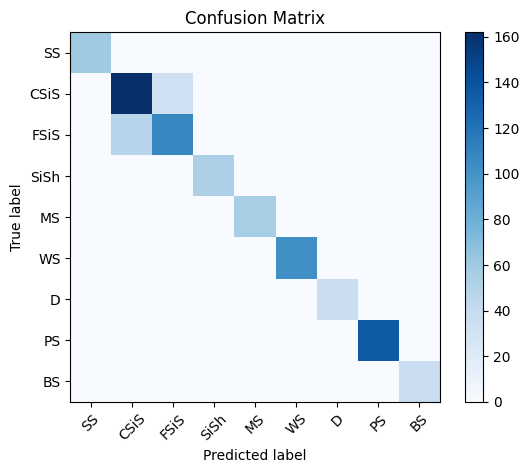

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


conf_RFC = confusion_matrix(y_test, yhat_RFC)

# Plot confusion matrix for Random Forest Classifier
plot_confusion_matrix(conf_RFC, facies_labels)

In [27]:
jNNC = jaccard_score(y_test, yhat_NNC, average='weighted')
f1NNC =  f1_score(y_test, yhat_NNC, average='weighted')

print("NNC Jaccard index: %.3f" %jNNC)
print("NNC F1-score: %.3f" %f1NNC )

conf_NNC = confusion_matrix(y_test, yhat_NNC)
display_cm(conf_NNC, facies_labels, hide_zeros=True, display_metrics=True)

NNC Jaccard index: 0.839
NNC F1-score: 0.900
Confusion Matrix:
SS: [60  0  0  0  0  0  0  0  0]
CSiS: [  0 163  32   0   0   0   0   0   0]
FSiS: [  0  49 107   0   0   0   0   0   0]
SiSh: [ 0  0  0 53  0  0  0  0  0]
MS: [ 0  0  0  0 56  0  0  0  0]
WS: [  0   0   0   0   0 102   0   0   0]
D: [ 0  0  0  0  0  0 35  1  0]
PS: [  0   0   0   0   0   0   0 135   0]
BS: [ 0  0  0  0  0  0  0  0 37]


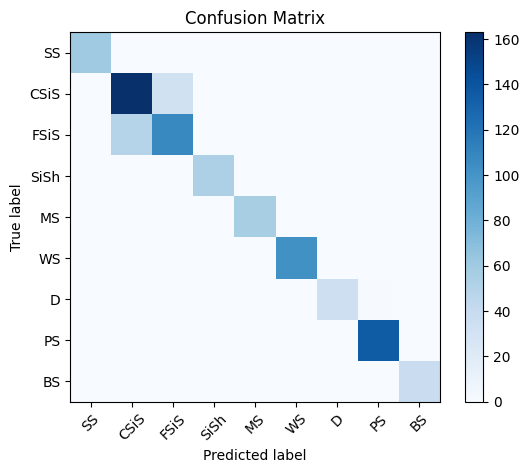

In [28]:
conf_NNC = confusion_matrix(y_test, yhat_NNC)
plot_confusion_matrix(conf_NNC, facies_labels)

In [29]:
jDT = jaccard_score(y_test, yhat_NNC, average='weighted')
f1DT = f1_score(y_test, yhat_DT, average='weighted')
print("DT Jaccard index: %.3f" % jDT )
print("DT F1-score: %.3f" % f1DT )

conf_DT = confusion_matrix(y_test, yhat_DT)
display_cm(conf_DT, facies_labels, hide_zeros=True, display_metrics=True)

DT Jaccard index: 0.839
DT F1-score: 0.858
Confusion Matrix:
SS: [60  0  0  0  0  0  0  0  0]
CSiS: [  0 129  66   0   0   0   0   0   0]
FSiS: [  0  52 104   0   0   0   0   0   0]
SiSh: [ 0  0  0 53  0  0  0  0  0]
MS: [ 0  0  0  0 56  0  0  0  0]
WS: [  0   0   0   0   0 102   0   0   0]
D: [ 0  0  0  0  0  0 36  0  0]
PS: [  0   0   0   0   0   0   0 135   0]
BS: [ 0  0  0  0  0  0  0  0 37]


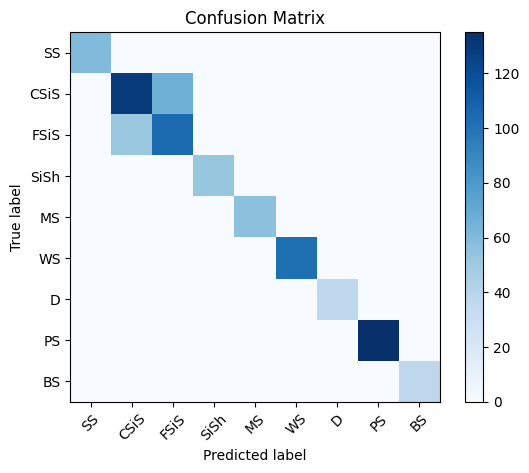

In [30]:
conf_DT = confusion_matrix(y_test, yhat_DT)

plot_confusion_matrix(conf_DT, facies_labels)

In [17]:
y_blind = blind['Facies'].values
blind_features = blind.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)
X_blind = scaler.transform(blind_features)

NameError: name 'blind' is not defined

In [ ]:
blind.to_csv('blind.csv')

In [ ]:
blind_features1 = blind[['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M','RELPOS']]

blind_features1

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
2787,106.813,0.533,9.339,15.222,3.500,1,1.000
2788,100.938,0.542,8.857,15.313,3.416,1,0.977
2789,94.375,0.553,7.097,14.583,3.195,1,0.955
2790,89.813,0.554,7.081,14.110,2.963,1,0.932
2791,91.563,0.560,6.733,13.189,2.979,1,0.909
...,...,...,...,...,...,...,...
3197,70.750,0.936,2.249,8.249,4.062,2,0.536
3198,61.500,0.932,2.120,8.231,4.137,2,0.527
3199,56.813,0.926,1.909,8.248,4.105,2,0.518
3200,52.281,0.921,1.109,8.022,3.965,2,0.509


#### Predicting facies for blind well by all models

In [ ]:
#RFC
yhat_blind_RFC = RFC_model.predict(X_blind)
blind['RFC_Pred'] = yhat_blind_RFC

#NNC
yhat_blind_NNC = NNC_model.predict(X_blind)
blind['NNC_Pred'] = yhat_blind_NNC

#DT
yhat_blind_DT = DT_model.predict(X_blind)
blind['DT_Pred'] = yhat_blind_DT


C:\Users\Ritesh\AppData\Local\Temp\ipykernel_15680\662455110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blind['RFC_Pred'] = yhat_blind_RFC
C:\Users\Ritesh\AppData\Local\Temp\ipykernel_15680\662455110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blind['NNC_Pred'] = yhat_blind_NNC
C:\Users\Ritesh\AppData\Local\Temp\ipykernel_15680\662455110.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [ ]:
def compare_all_facies(logs, Pred, facies_colors):
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster_initial = np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    cluster = np.repeat(np.expand_dims(logs[Pred].values,1), 100, 1)

   
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(3, 6))

    im1 = ax[0].imshow(cluster_initial, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)

    im8 = ax[1].imshow(cluster, interpolation='none', aspect='auto',
                       cmap=cmap_facies,vmin=1,vmax=9)
       
    
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="10%", pad=0.05)
    cbar=plt.colorbar(im8, cax=cax)
    cbar.set_label((5*' ').join([' SS ', 'CSiS', 'FSiS', 
                                'SiSh', ' MS ', ' WS ', ' D  ', 
                                ' PS ', ' BS ']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-8):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=2)
    
    ax[0].set_xlabel('Facies'); ax[1].set_xlabel(Pred)

    
    ax[0].set_yticklabels([]) ; ax[1].set_yticklabels([]) 
    
    ax[0].set_xticklabels([]); ax[1].set_xticklabels([]) 


    f.suptitle('Prediction in well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

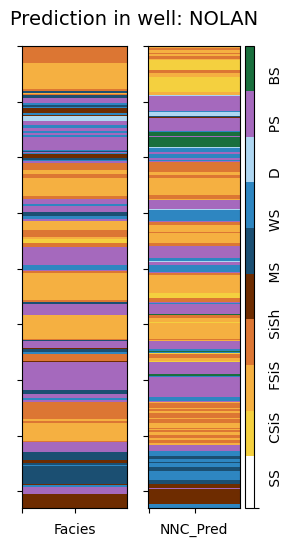

In [ ]:
compare_all_facies(blind,'NNC_Pred', facies_colors)